In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Q1. Consider a periodic square wave with time period T = 2 seconds having magnitude 1 between t = 0 s and t = 1 s and zero elsewhere. Let g(t) be the Fourier series representation of the square wave.
## (a) Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph. This plot is useful to see the emergence of the square wave as the number of terms in the representation increases.

Function definition of Analsysis and synthesis equations of FS

In [62]:
def FS_analysis(x,t,T,K):
    if K%2==0:
        k = np.arange(-K//2,K//2)
    else:
        k = np.arange(-K//2,(K//2)+1)
    c = np.zeros(K,dtype='complex')
    for j in k:
        for i in t:
            c[k==j] += (x[t==i])*np.exp(-1j*2*np.pi*j*i/T)
    c = c/len(t)
    return c

In [63]:
def FS_synthesis(c,t,T):
    K = len(c)
    if K%2==0:
        k = np.arange(-K//2,K//2)
    else:
        k = np.arange(-K//2,(K//2)+1)
    x =  np.zeros(len(t),dtype='complex')
    for i in t:
        for j in k:
            x[t==i] += c[k==j]*np.exp(1j*2*np.pi*j*i/T)
    return x

Calculating the Reconstructed signal x[n] for different number of FS coefficients

In [64]:
T1 = 2
fs1 = 100
t1 = np.arange(0,T1+(1/fs1),1/fs1)
x1 = np.zeros(len(t1))
x1[(t1>=0)&(t1<1)] = 1
x1[(t1>=1)&(t1<2)] = 0
K1 = [4,8,20,40,100,160]
x1_FS = []
x1_recon = []
for i in range(len(K1)):
    temp_FS = FS_analysis(x1,t1,T1,K1[i])
    temp_recon = FS_synthesis(temp_FS,t1,T1)
    x1_FS.append(temp_FS)
    x1_recon.append(temp_recon)

Plotting the Reconstructed signal along with original signal

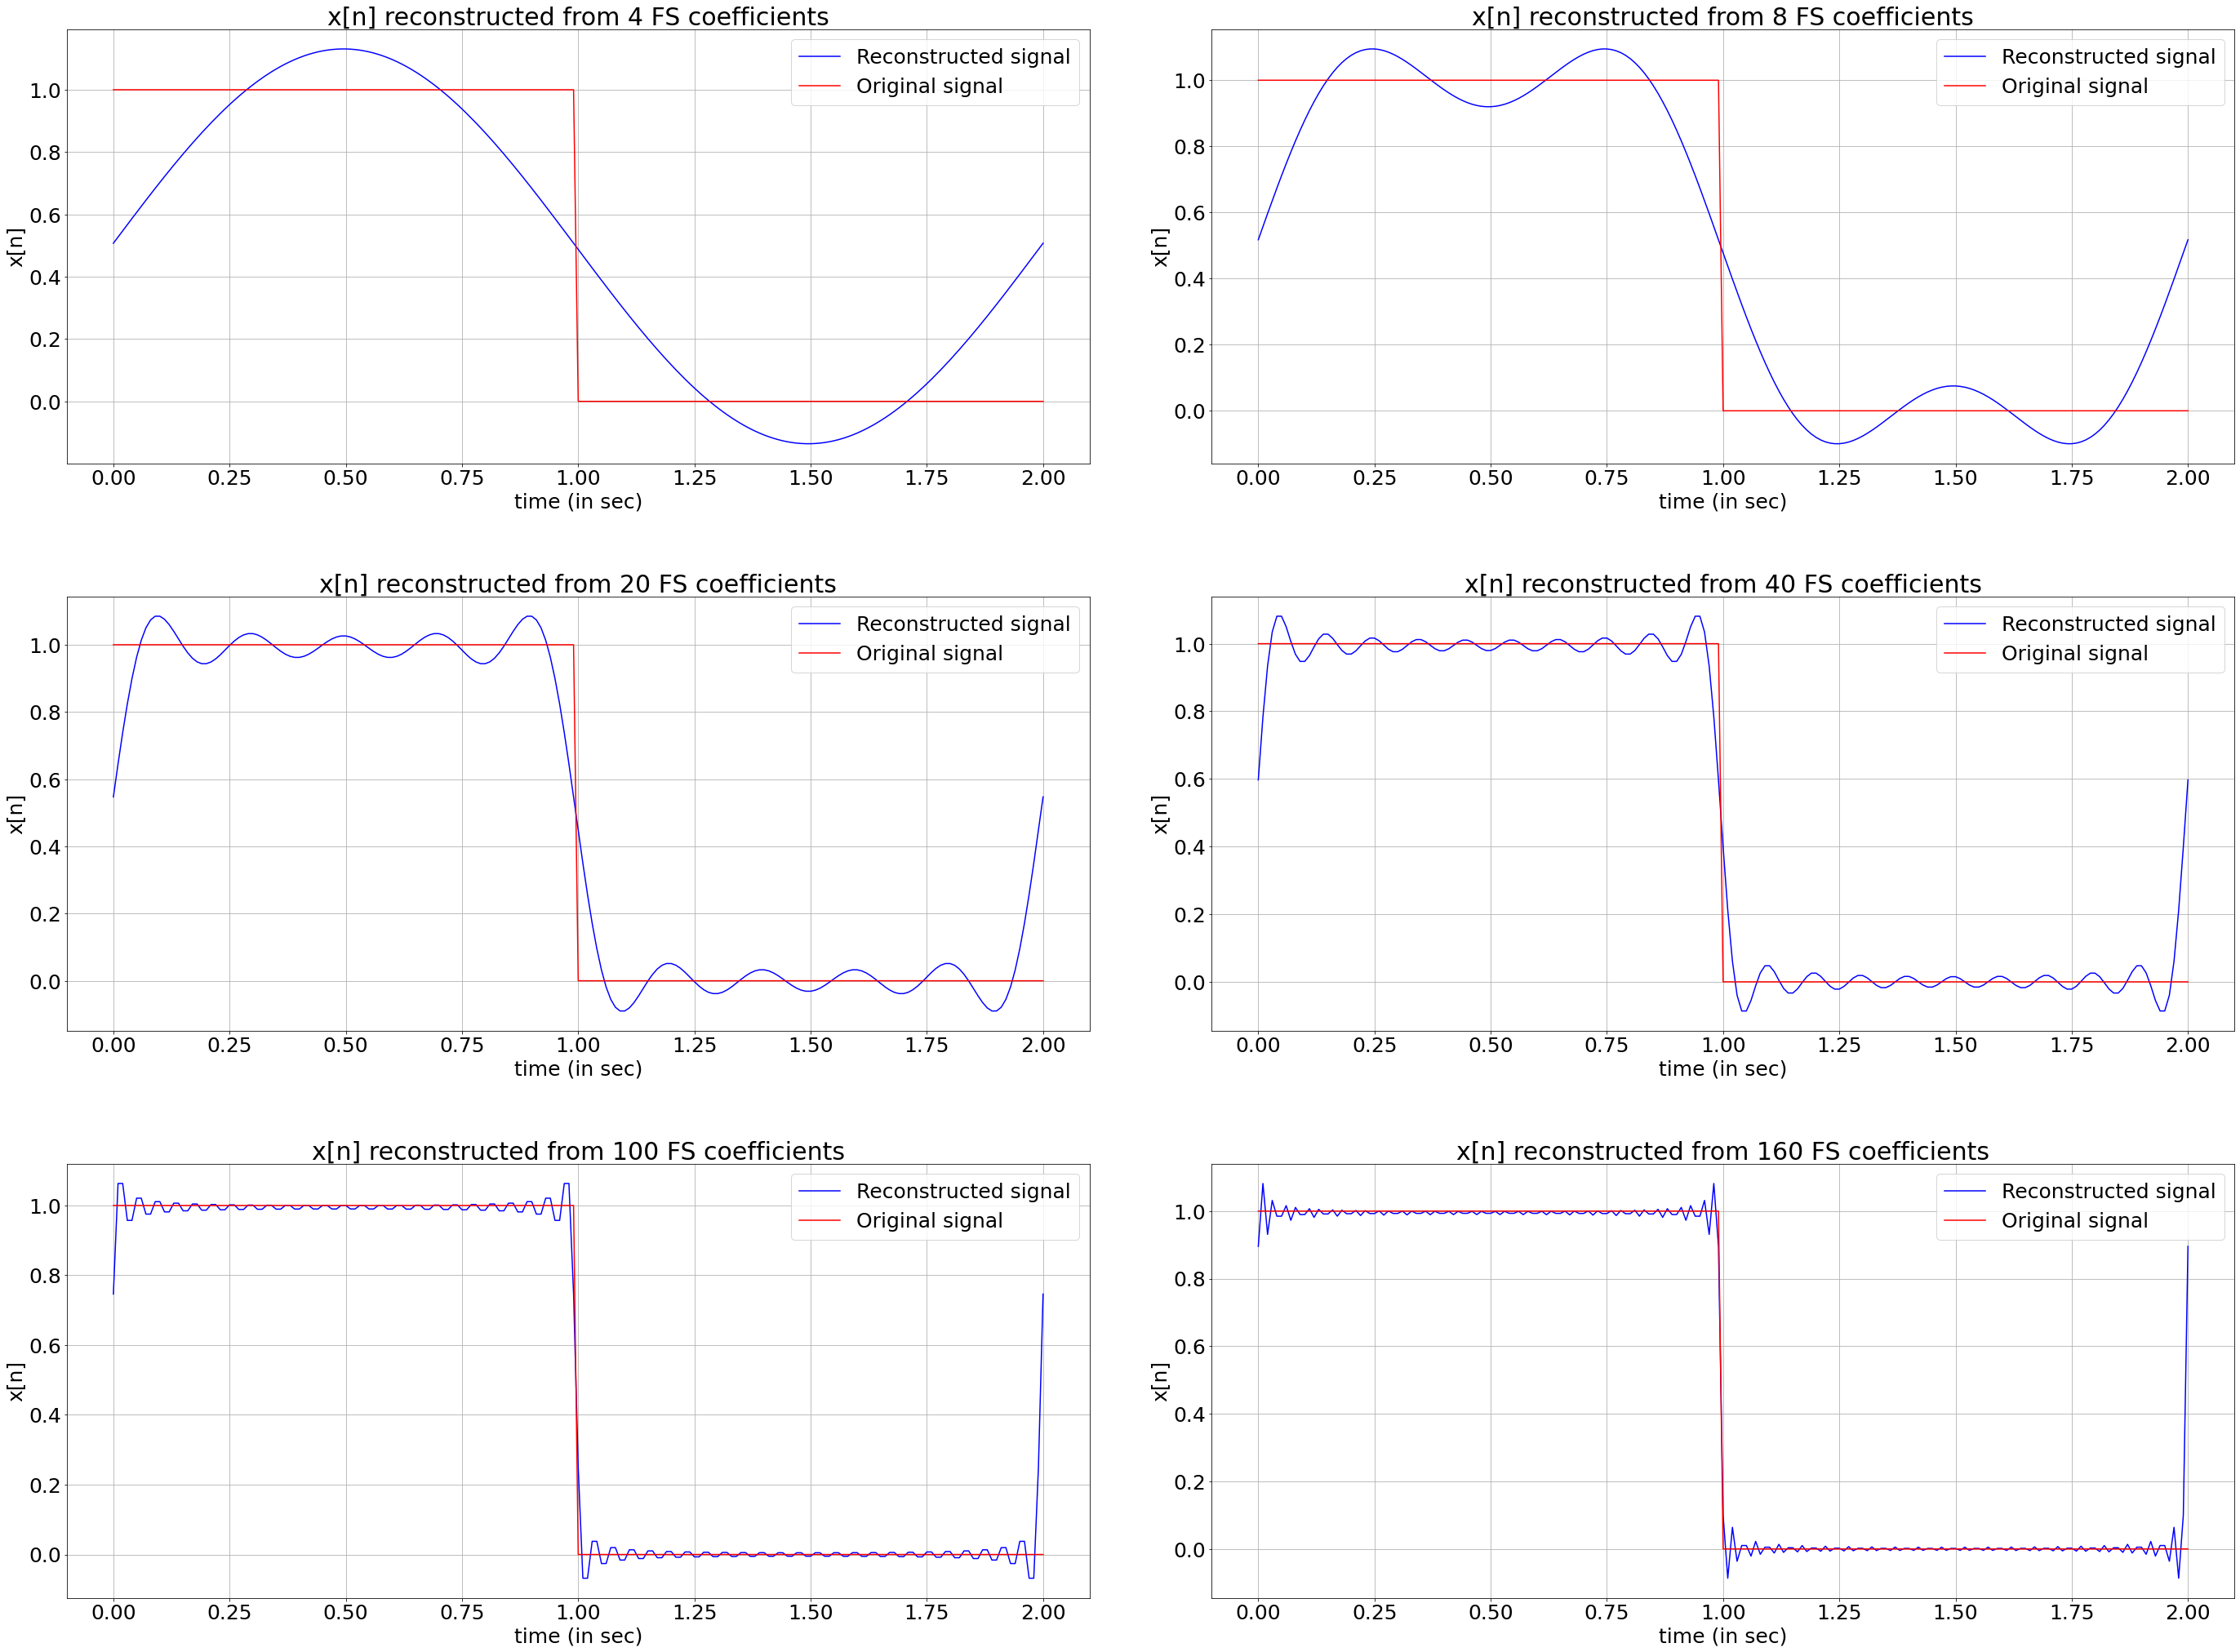

In [65]:
matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(len(K1)//2,2,figsize=(40, 30))
p = 0
for i in range(len(K1)//2):
    for j in range(2):
        ax[i,j].plot(t1,np.real(x1_recon[p]),color='b',label='Reconstructed signal')
        ax[i,j].plot(t1,x1,color='r',label='Original signal')
        ax[i,j].set_title(f'x[n] reconstructed from {K1[p]} FS coefficients')
        ax[i,j].set_xlabel('time (in sec)')
        ax[i,j].set_ylabel('x[n]')
        ax[i,j].legend()
        ax[i,j].grid()
        p+=1
fig.tight_layout(pad=3.0)

## (b) What happens to the Gibbs phenomenon when the number of terms becomes large?

As the no. of Fourier series coefficients used for reconstruction of square wave signal increases, the frequency of transient oscillations at the jump discontinuties of reconstructed signal increases thereby reducing the Gibbs phenomenon. But the overshoots at the jump discontinues will still be finite despite the no. of Fourier series coefficients used for signal reconstruction is very large. The Gibbs phenomenon vanishes only when signal is reconstructed from infinite no. of Fourier series coefficients

# Q2. A signal is given as x(t) = cos2pift where f = 30 Hz. The signal is sampled at 100 times per second for 0.99 seconds and then its DFT is computed.

Function definition of DFT

In [66]:
def DFT(x):
    N = len(x)
    temp_DFT = np.zeros(N,dtype='complex')
    for k in range(N):
        for n in range(N):
            temp_DFT[k] += x[n]*np.exp(-1j*2*np.pi*k*n/N)
    return temp_DFT
            

Function definition of Inverse DFT

In [67]:
def IDFT(X):
    N = len(X)
    temp_IDFT = np.zeros(N,dtype='complex')
    for n in range(N):
        for k in range(N):
            temp_IDFT[n] += X[k]*np.exp(1j*2*np.pi*k*n/N)
    temp_IDFT = temp_IDFT/N
    return temp_IDFT

Calculating the DFT of signal x[n] and its PSD

In [68]:
f1 = 30
T1 = 0.99
fs1 = 100
t1 = np.arange(0,T1,1/fs1)
x1 = np.cos(2*np.pi*f1*t1)
x1_dft = DFT(x1)
N1 = len(x1)
n1 = np.arange(0,N1)
x1_PSD = np.square(np.abs(x1_dft))/N1


## (a) Plot the power spectral density and visualize the Spectral Leakage.

Plotting the PSD of x[n]

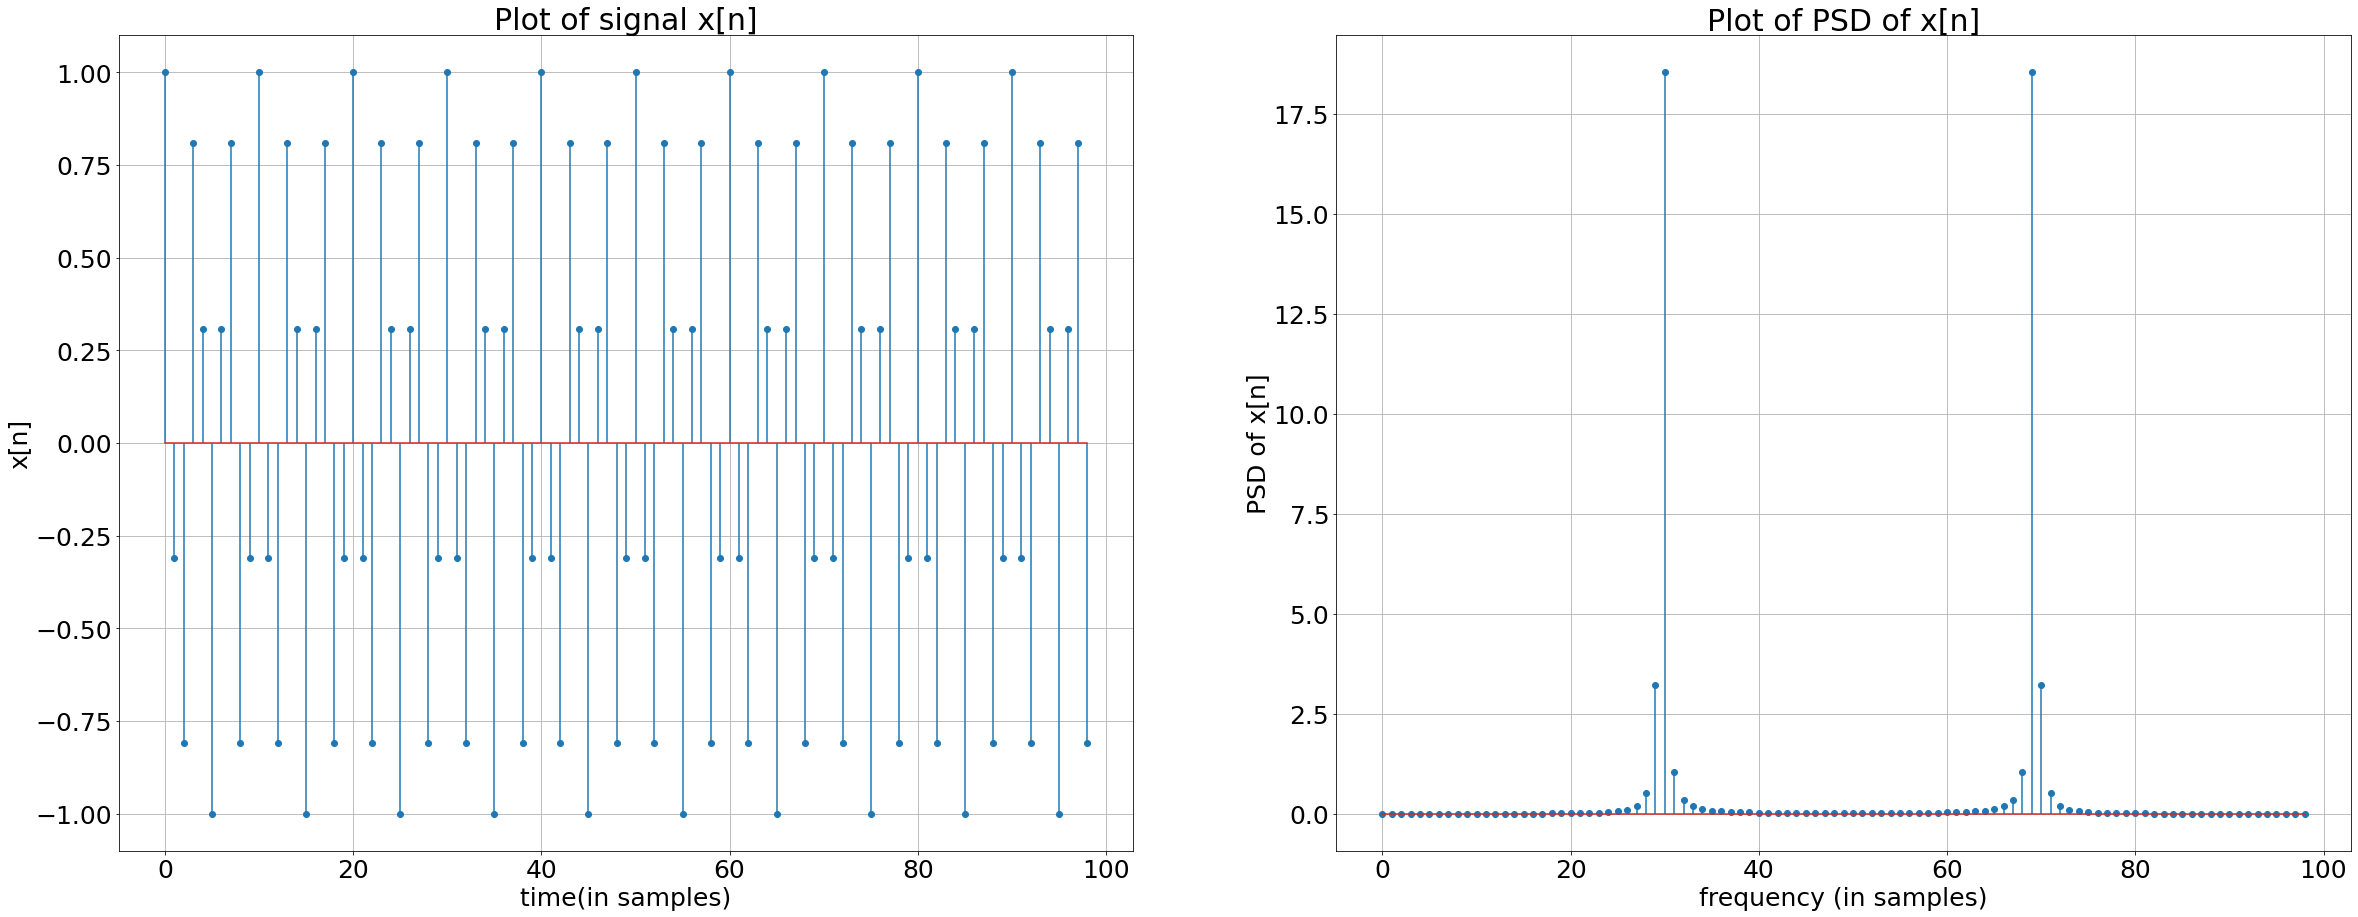

In [69]:
xvalues = [n1,n1]
yvalues = [x1,x1_PSD]
titles = ['Plot of signal x[n]','Plot of PSD of x[n]']
xlabels = ['time(in samples)','frequency (in samples)']
ylabels = ['x[n]','PSD of x[n]']
matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(1,len(yvalues),figsize=(40,15))


for i in range(len(yvalues)):
    ax[i].stem(xvalues[i],yvalues[i],use_line_collection=True)
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_title(titles[i])
    ax[i].grid()


## (b) Using various window functions such as Hanning, Hamming, Bartlett etc. try to minimize the Spectral Leakage. Show the plots in each case.

Formed Hanning window, Hamming window, Bartlett window and Rectangular window and multiplied the input signal with each of these windows to obtain modified x[n].
Plotted the window functions along with the PSD of modified x[n]

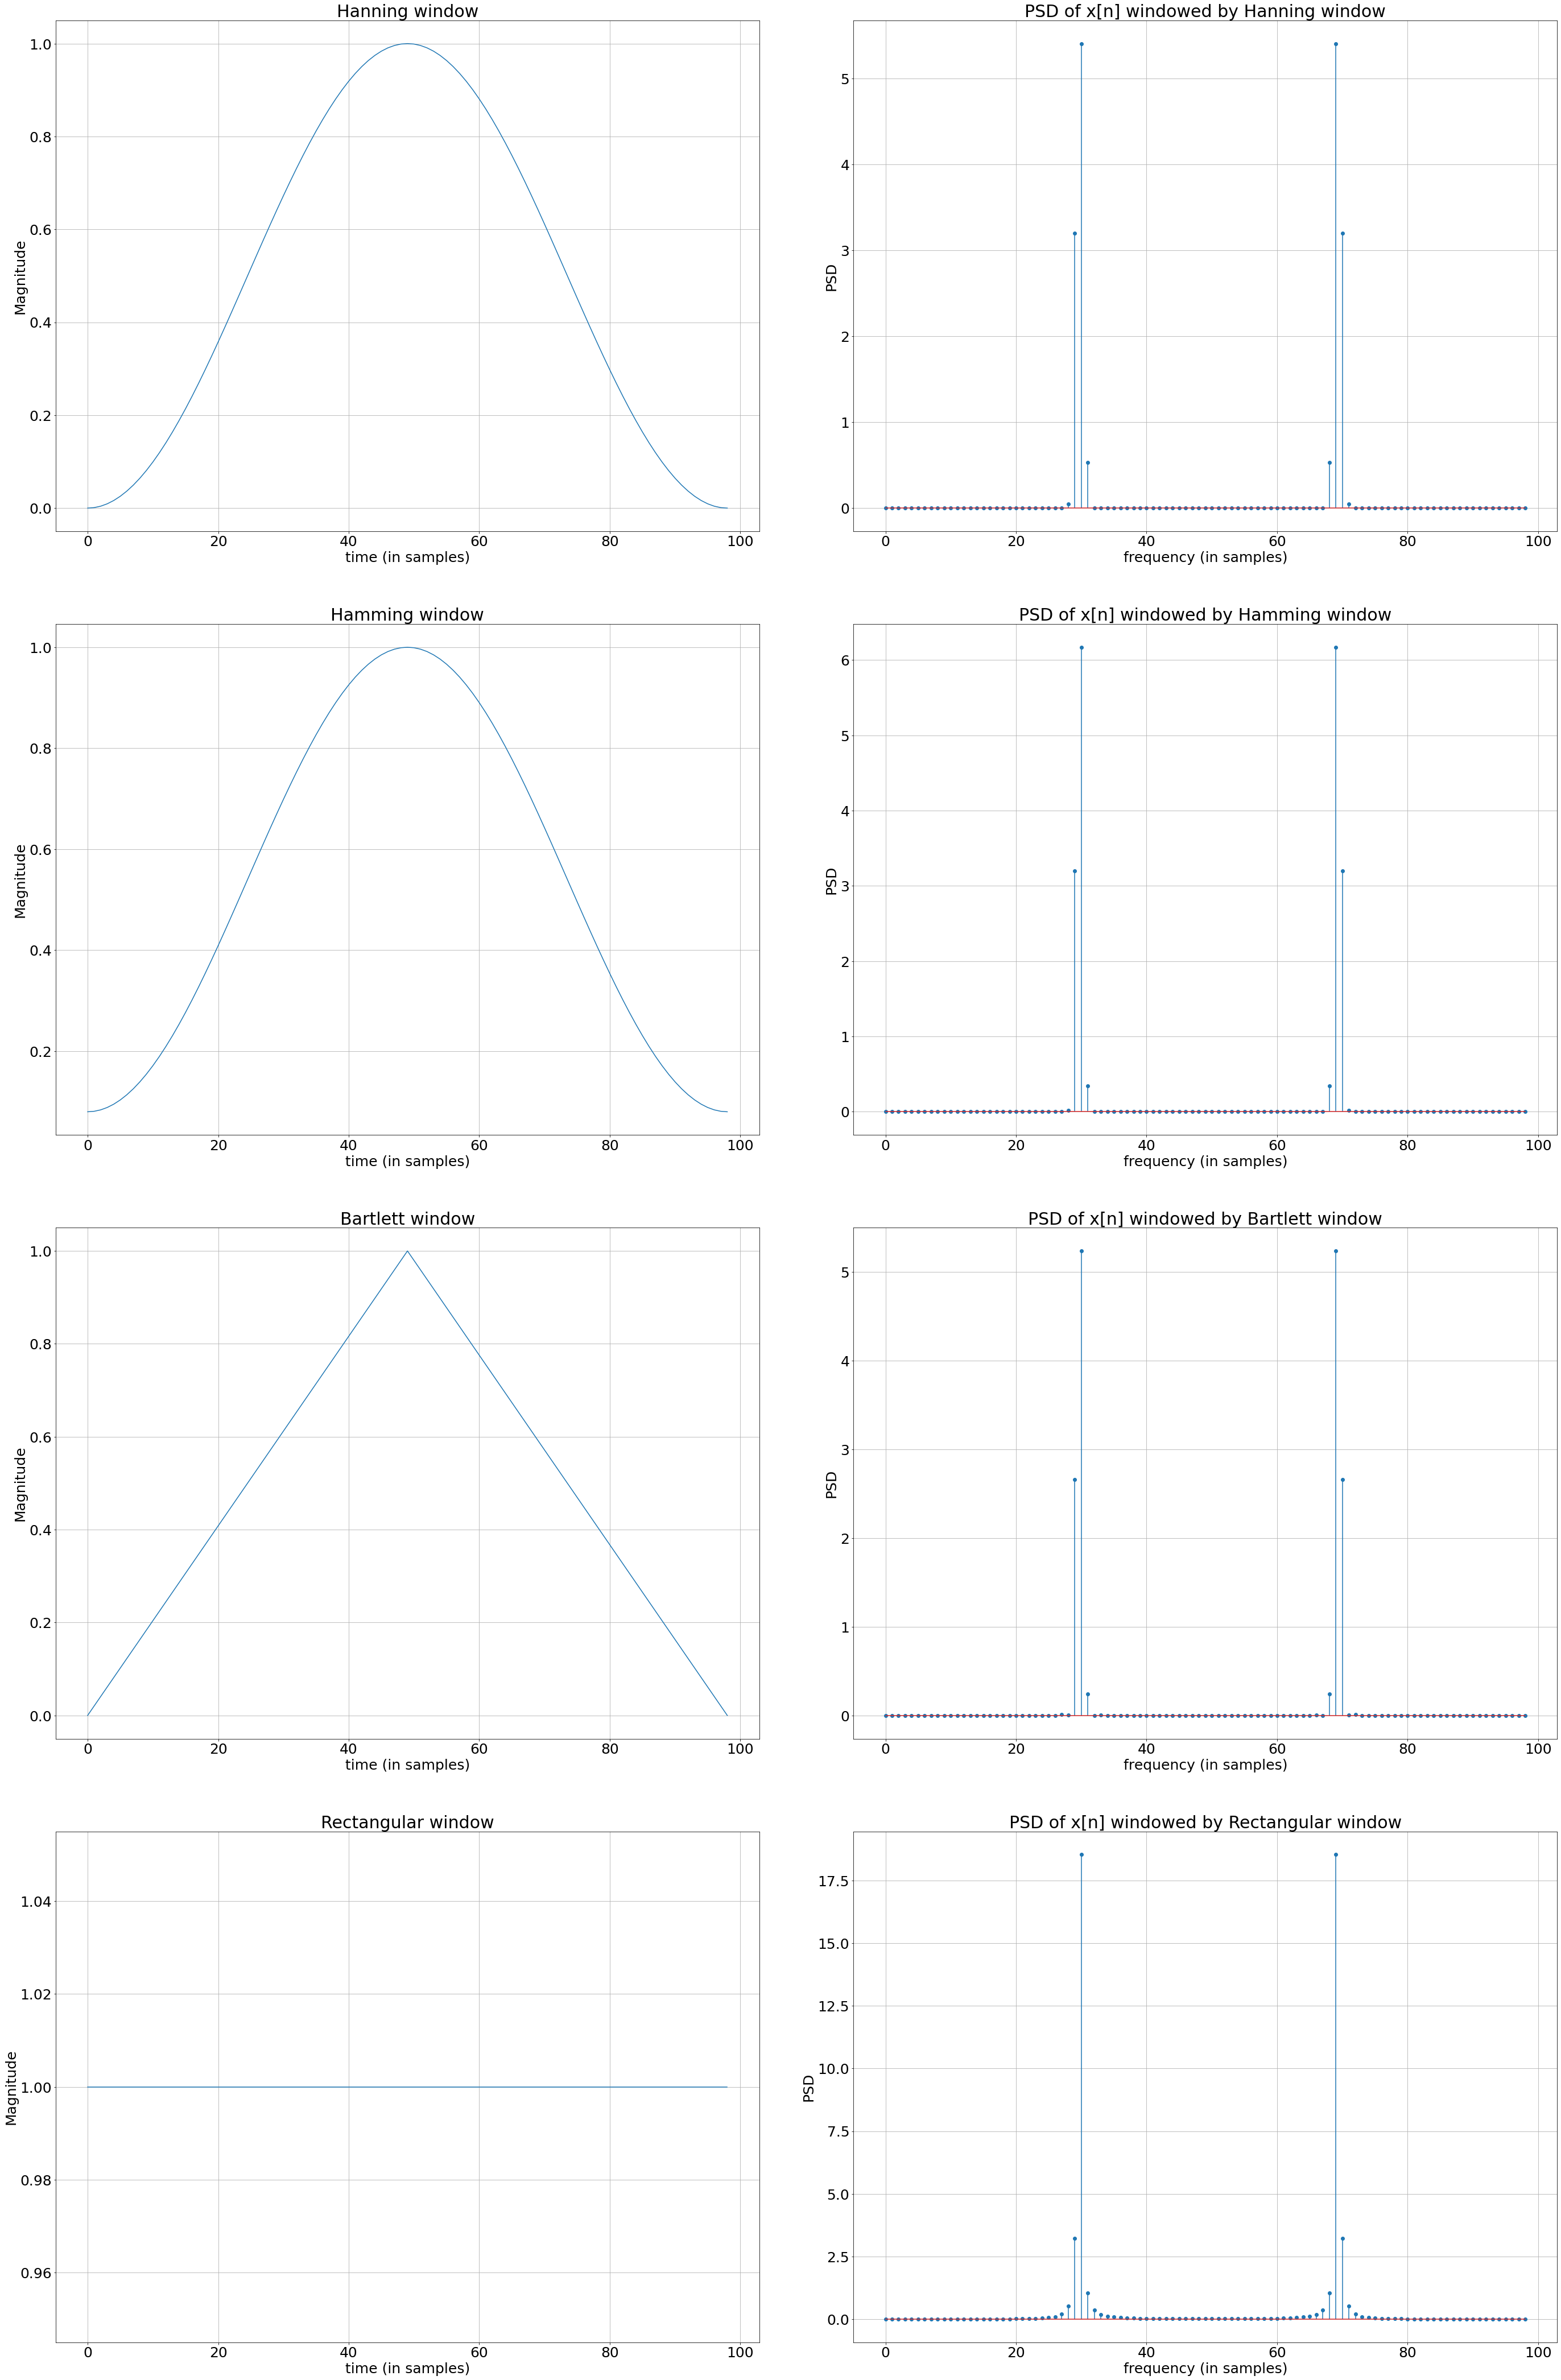

In [70]:
hann_wind = 0.5-0.5*np.cos(2*np.pi*n1/(N1-1))
x1_comp_hann = x1*hann_wind
x1_hann_dft = DFT(x1_comp_hann)
x1_hann_PSD = np.square(np.abs(x1_hann_dft))/N1

hamm_wind = 0.54-0.46*np.cos(2*np.pi*n1/(N1-1))
x1_comp_hamm = x1*hamm_wind
x1_hamm_dft = DFT(x1_comp_hamm)
x1_hamm_PSD = np.square(np.abs(x1_hamm_dft))/N1

bart_wind = 1 - np.abs((2*n1/(N1-1))-1)
x1_comp_bart = x1*bart_wind
x1_bart_dft = DFT(x1_comp_bart)
x1_bart_PSD = np.square(np.abs(x1_bart_dft))/N1

rect_wind = np.ones(len(n1))
x1_comp_rect = x1*rect_wind
x1_rect_dft = DFT(x1_comp_rect)
x1_rect_PSD = np.square(np.abs(x1_rect_dft))/N1

yvalues = [hann_wind,x1_hann_PSD,hamm_wind,x1_hamm_PSD,bart_wind,x1_bart_PSD,rect_wind,x1_rect_PSD]
titles = ['Hanning window','PSD of x[n] windowed by Hanning window','Hamming window','PSD of x[n] windowed by Hamming window','Bartlett window','PSD of x[n] windowed by Bartlett window','Rectangular window','PSD of x[n] windowed by Rectangular window']


matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(len(yvalues)//2,2,figsize=(40,60))
p=0
for i in range(len(yvalues)//2):
    for j in range(2): 
        if j==0:
            ax[i,j].plot(n1,yvalues[p])
            ax[i,j].set_xlabel('time (in samples)')
            ax[i,j].set_ylabel('Magnitude')
        else:
            ax[i,j].stem(n1,yvalues[p],use_line_collection=True)
            ax[i,j].set_xlabel('frequency (in samples)')
            ax[i,j].set_ylabel('PSD')
        ax[i,j].set_title(titles[p])
        ax[i,j].grid()
        p+=1
fig.tight_layout(pad=3.0)

# Q3. Consider the signal x(t) = cos(2pif1t) + cos(2pif2t) where f1 = 10 Hz and f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is corrupted with white noise having zero mean and unit variance.

## (a) Find the power spectral density of y(t) and show a labelled plot.

Calculated the PSD of x(t) and y(t)

In [71]:
f1 = 10
f2 = 30
fs = 100
t1 = np.arange(0,1.5,1/fs)
x1 = np.cos(2*np.pi*f1*t1)+np.cos(2*np.pi*f2*t1)
w_noise1 = np.random.normal(0,1,len(t1))
y1 = x1 + w_noise1
N1 = len(x1)
n1 = np.arange(0,N1)
x1_dft = DFT(x1)
x1_PSD = np.square(np.abs(x1_dft))/N1
y1_dft = DFT(y1)
y1_PSD = np.square(np.abs(y1_dft))/N1

Plotted the PSD of x(t) and y(t)

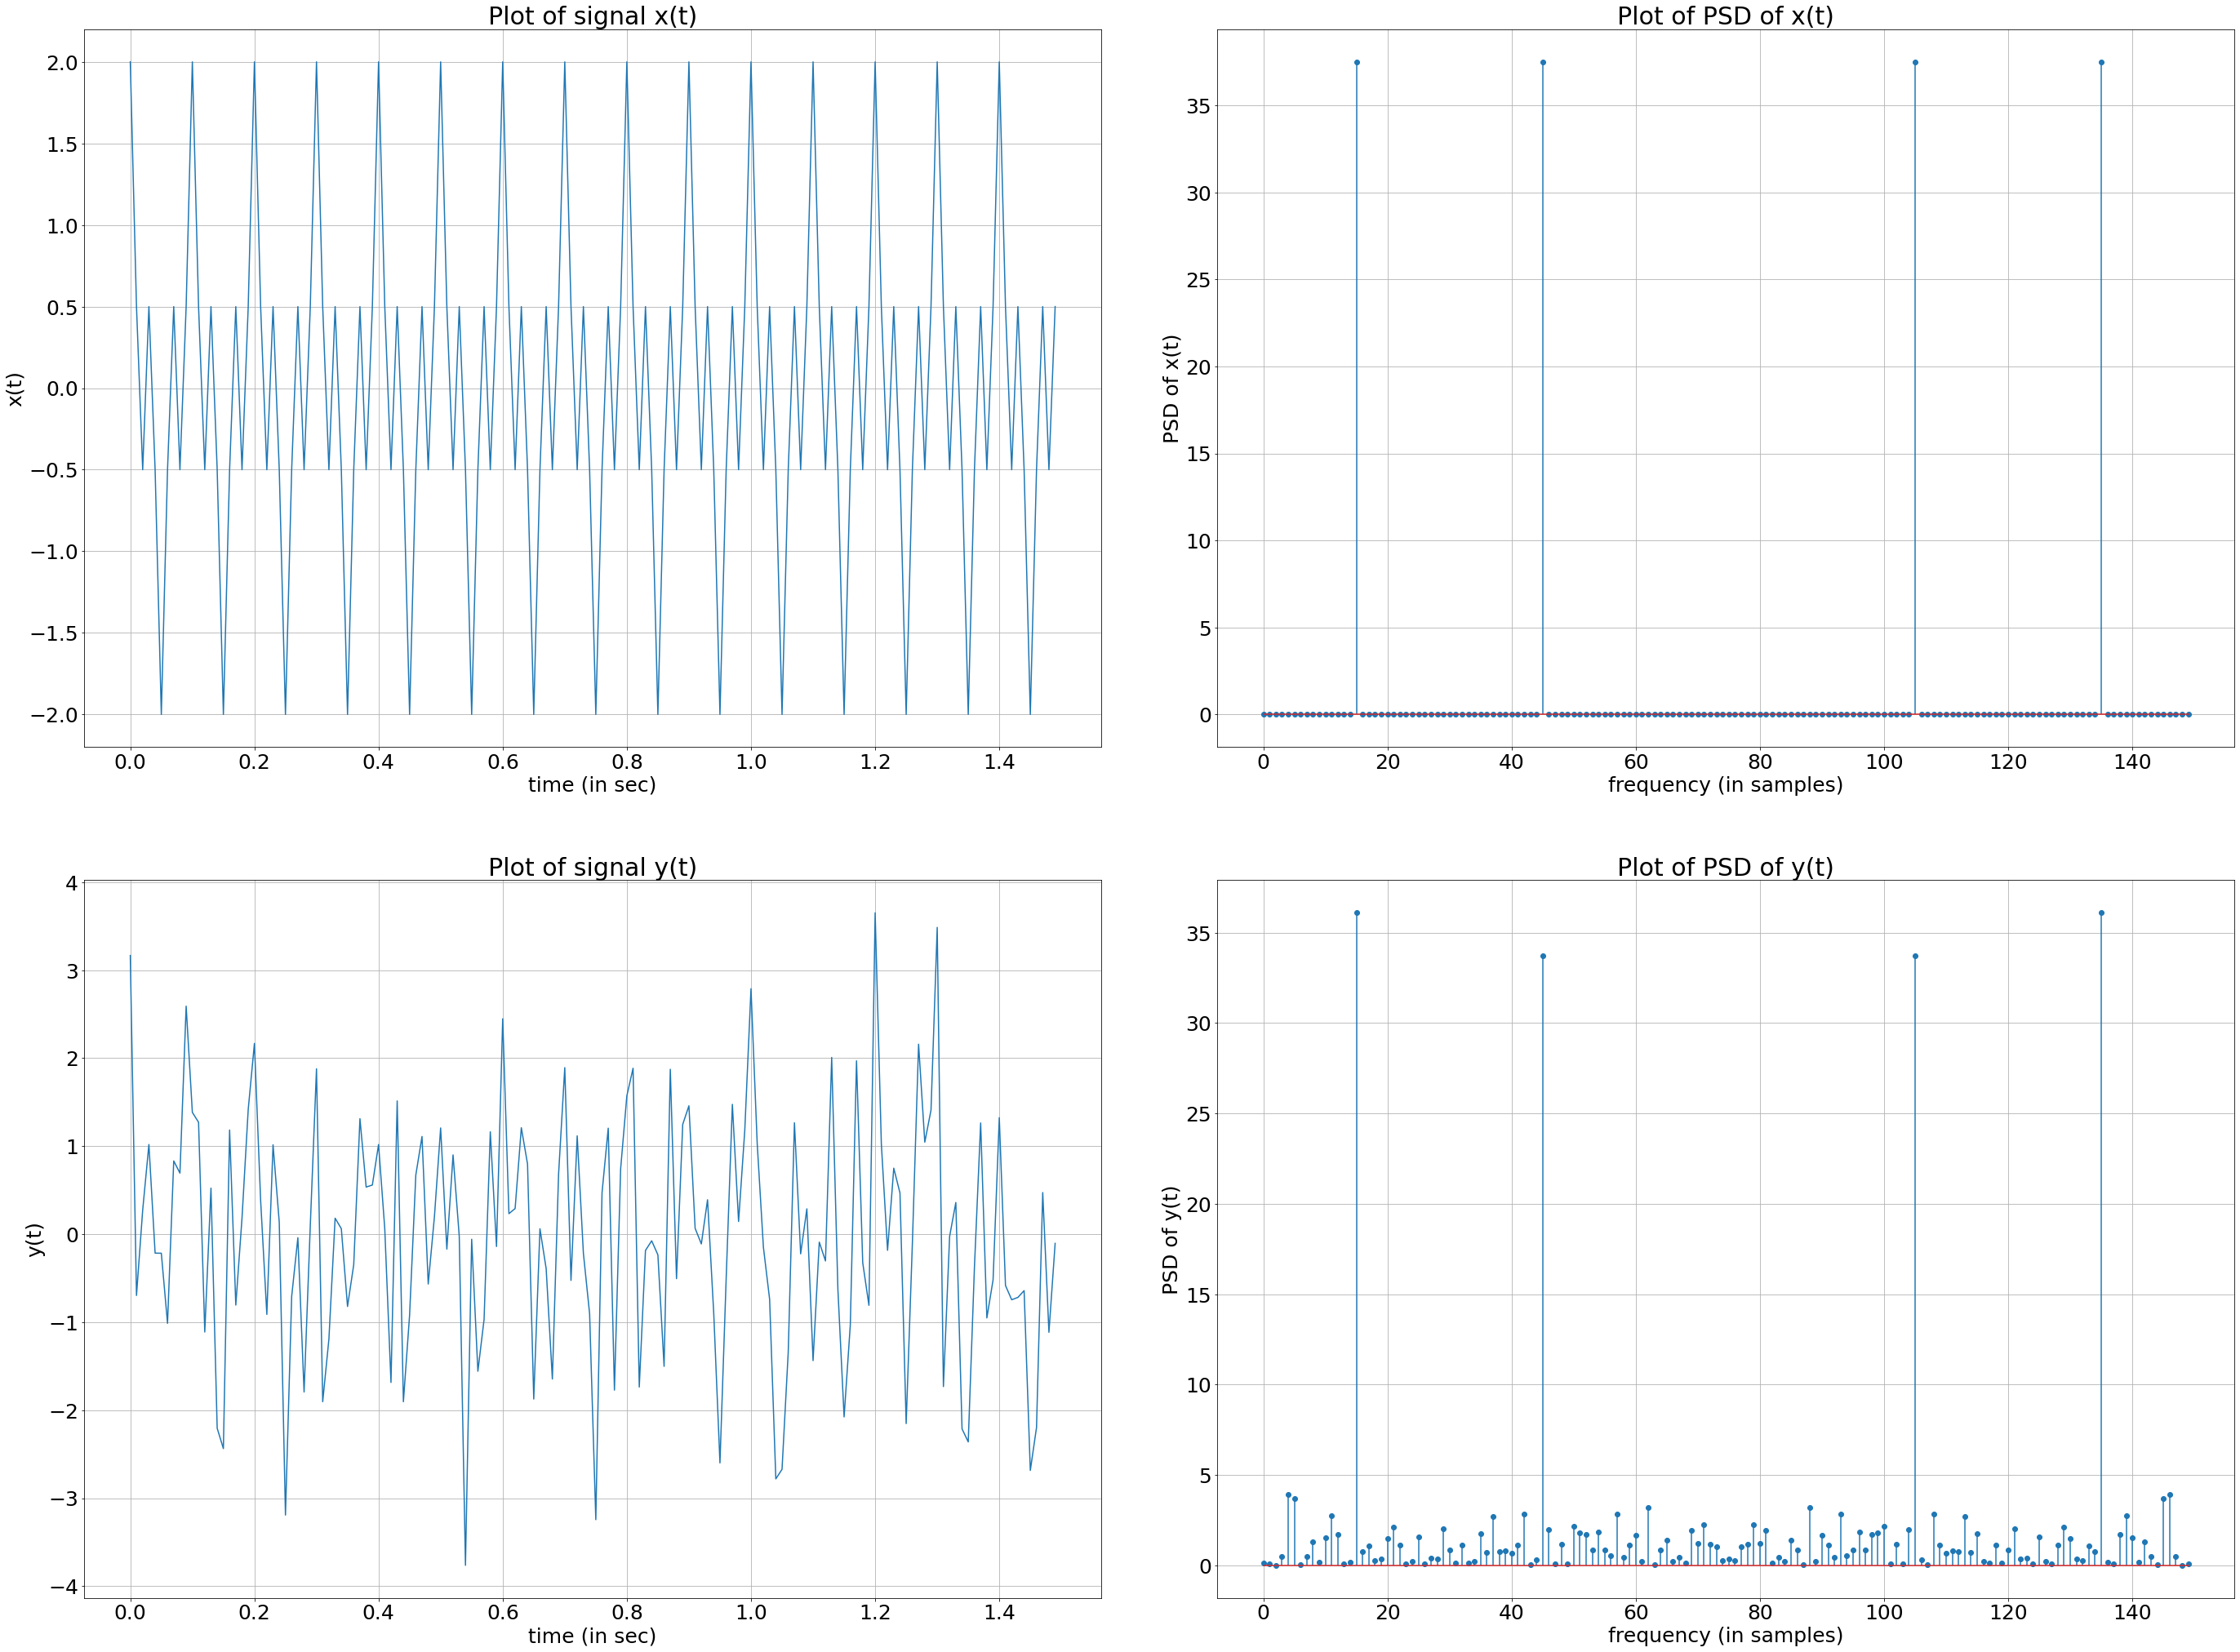

In [72]:
xvalues = [t1,n1,t1,n1]
yvalues = [x1,x1_PSD,y1,y1_PSD]
titles = ['Plot of signal x(t)','Plot of PSD of x(t)','Plot of signal y(t)','Plot of PSD of y(t)']
xlabels = ['time (in sec)','frequency (in samples)','time (in sec)','frequency (in samples)']
ylabels = ['x(t)','PSD of x(t)','y(t)','PSD of y(t)']
matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(len(yvalues)//2,2,figsize=(40,30))

p=0
for i in range(len(yvalues)//2):
    for j in range(2):
        if j==0:
            ax[i,j].plot(xvalues[p],yvalues[p])
        else:
            ax[i,j].stem(xvalues[p],yvalues[p],use_line_collection=True)
        ax[i,j].set_xlabel(xlabels[p])
        ax[i,j].set_ylabel(ylabels[p])
        ax[i,j].set_title(titles[p])
        ax[i,j].grid()
        p+=1
fig.tight_layout(pad=3.0)

## (b) From the PSD, find a suitable threshold for denoising the signal. 

From the PSD plot of y(t), we can chose a threshold of 30 for PSD and make all the DFT coefficients of y(t) corresponding to PSD less than 30 to zeros and x(t) can be reconstructed from these modified DFT coefficients of y(t)

In [73]:
threshold = 30

## (c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

Calculated the reconstructed x(t) from y(t) using the threshold

In [74]:
indices = np.zeros(N1)
indices[y1_PSD>threshold] = 1
x1_recon_PSD = y1_PSD*indices
x1_recon_dft = y1_dft*indices
x1_recon = np.real(IDFT(x1_recon_dft))




Plotted the PSD of y(t), PSD of x(t) reconstructed from y(t), Magnitude of DFT coefficients of y(t), Magnitude of DFT coefficients of reconstructed x(t), x(t) reconstructed from y(t) and the original signal x(t)

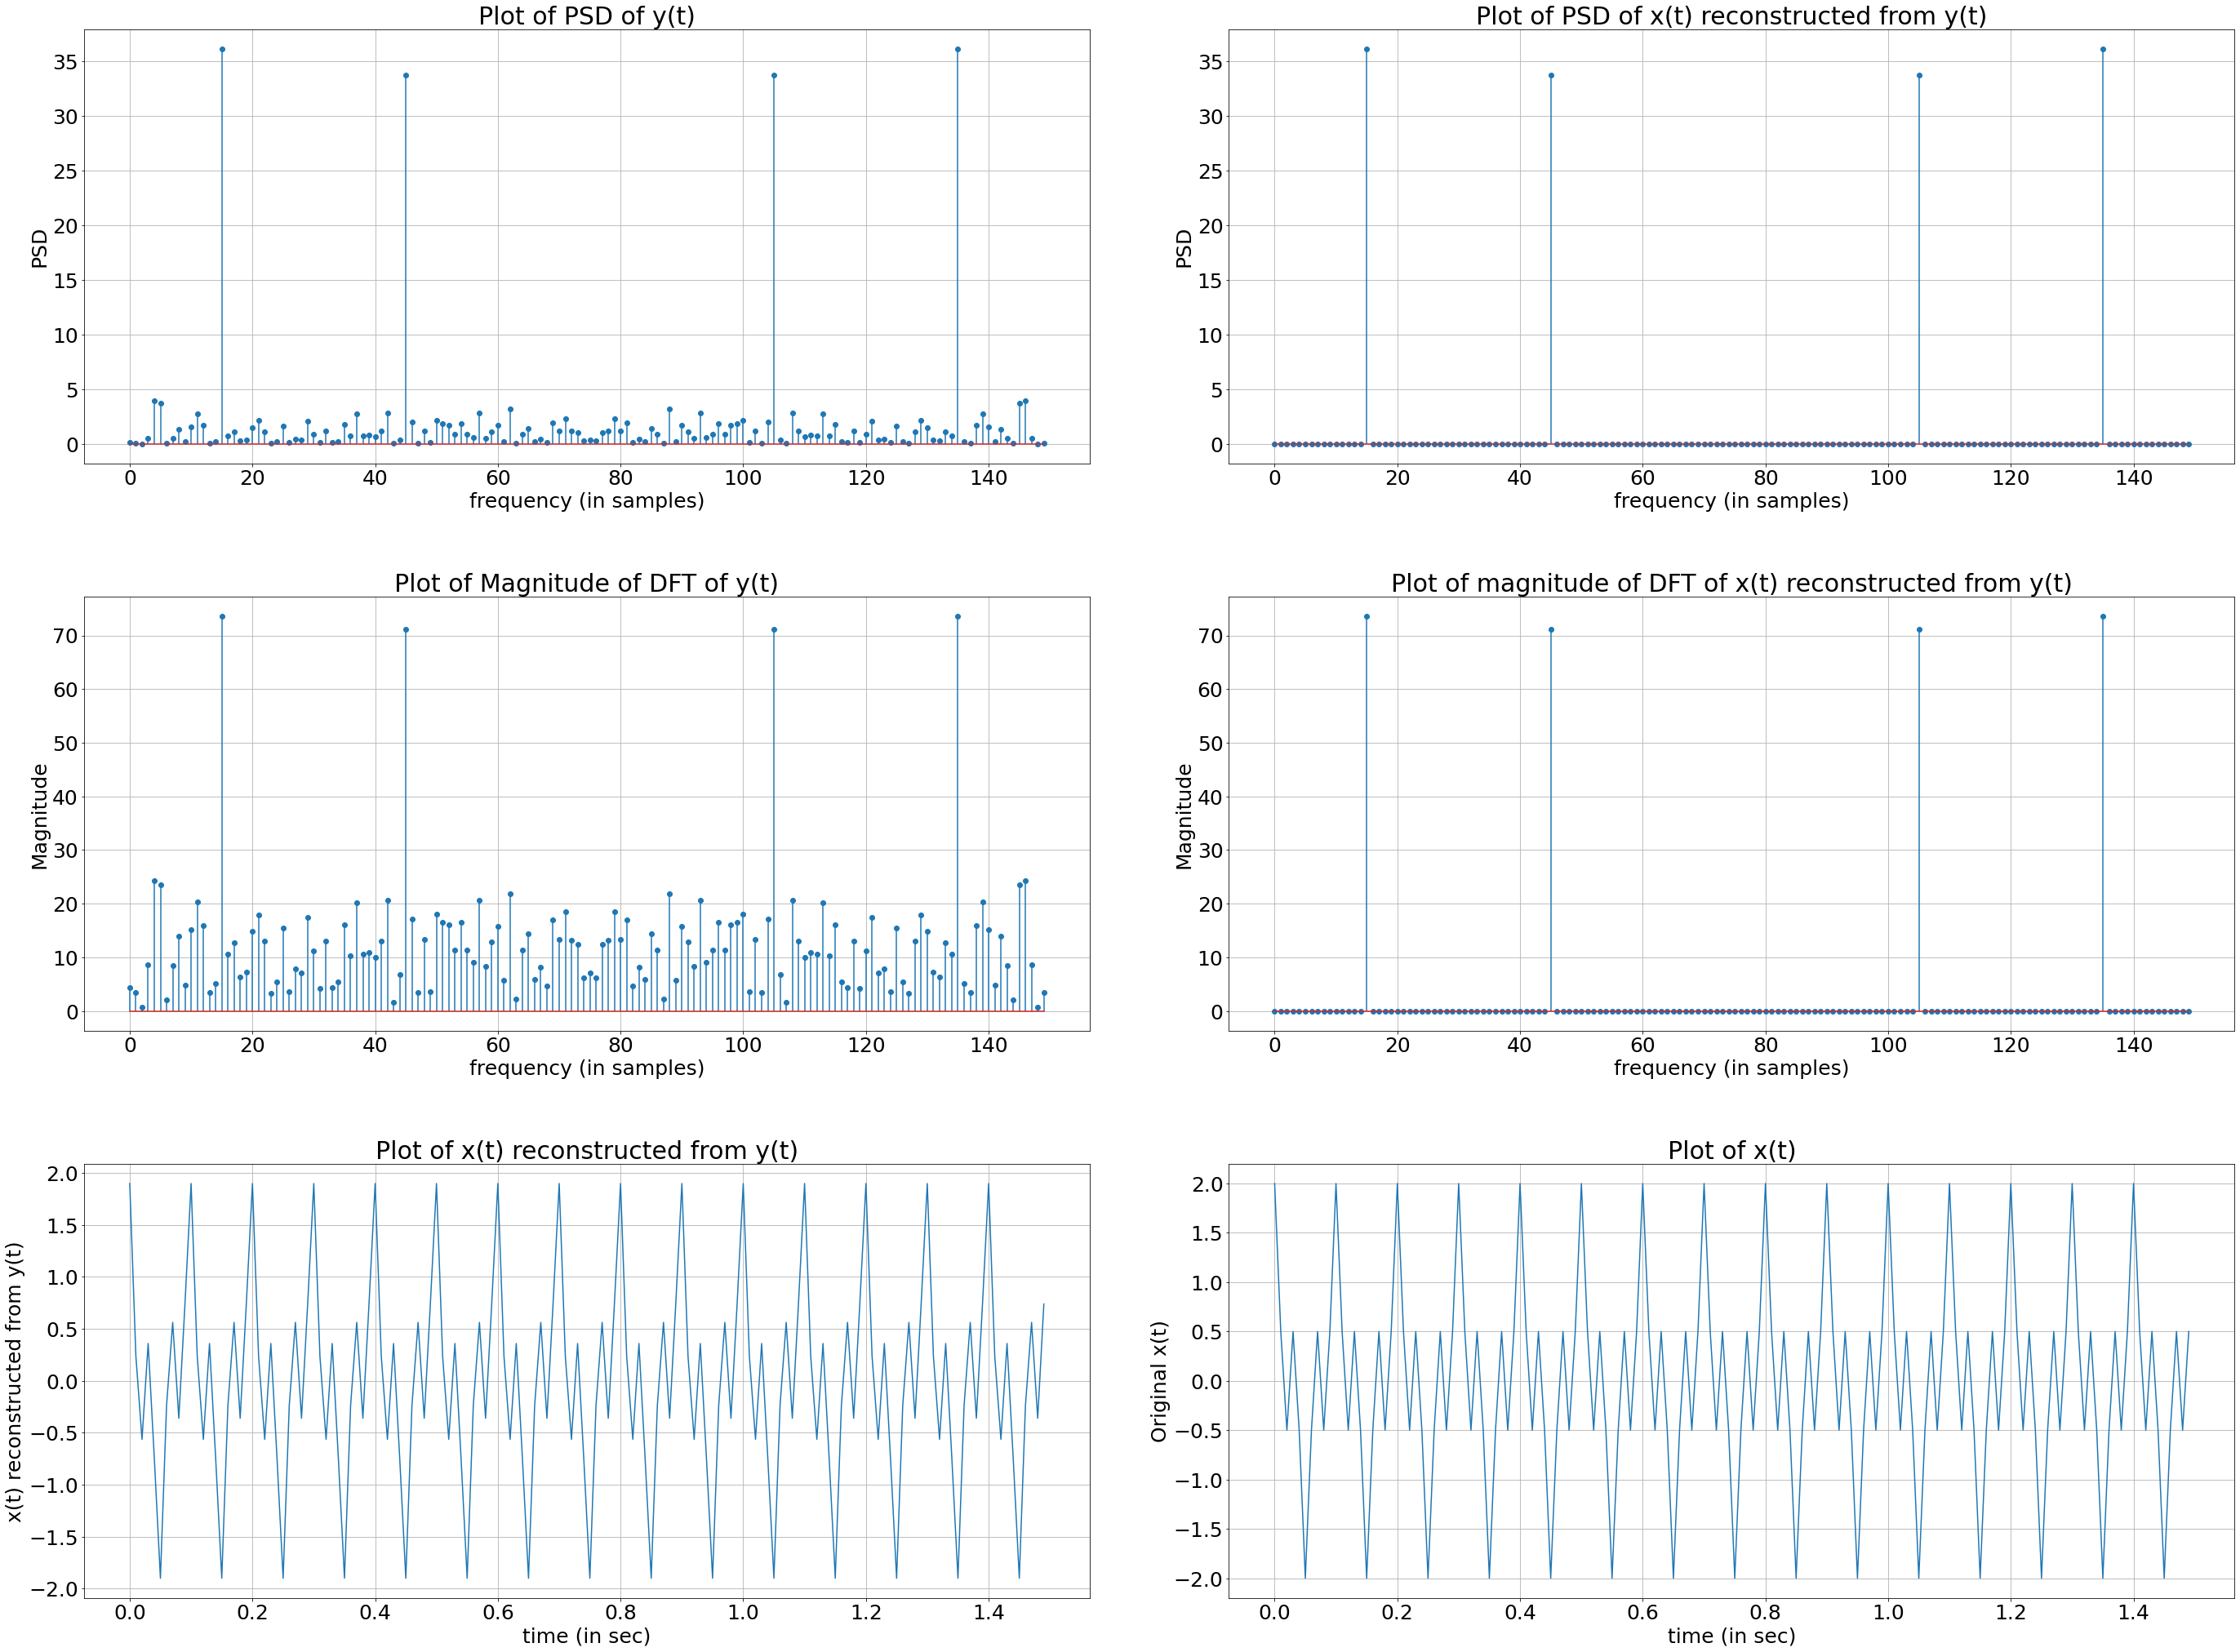

In [75]:
xvalues = [n1,n1,n1,n1,t1,t1]
yvalues = [y1_PSD,x1_recon_PSD,np.abs(y1_dft),np.abs(x1_recon_dft),x1_recon,x1]
titles = ['Plot of PSD of y(t)','Plot of PSD of x(t) reconstructed from y(t)','Plot of Magnitude of DFT of y(t)','Plot of magnitude of DFT of x(t) reconstructed from y(t)','Plot of x(t) reconstructed from y(t)','Plot of x(t)']
xlabels = ['frequency (in samples)','frequency (in samples)','frequency (in samples)','frequency (in samples)','time (in sec)','time (in sec)']
ylabels = ['PSD','PSD','Magnitude','Magnitude','x(t) reconstructed from y(t)','Original x(t)']
matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(len(yvalues)//2,2,figsize=(40,30))

p=0
for i in range(len(yvalues)//2):
    for j in range(2):
        if i==0 or i==1:
            ax[i,j].stem(xvalues[p],yvalues[p],use_line_collection=True)
        else:
            ax[i,j].plot(xvalues[p],yvalues[p])
        ax[i,j].set_xlabel(xlabels[p])
        ax[i,j].set_ylabel(ylabels[p])
        ax[i,j].set_title(titles[p])
        ax[i,j].grid()
        p+=1
fig.tight_layout(pad=3.0)